In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import collections
from itertools import chain
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('final_mfrc_data.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61226 entries, 0 to 61225
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        61226 non-null  object
 1   subreddit   61226 non-null  object
 2   bucket      61226 non-null  object
 3   annotator   61226 non-null  object
 4   annotation  61226 non-null  object
 5   confidence  61184 non-null  object
dtypes: object(6)
memory usage: 2.8+ MB


### Data Preprocessing


In [3]:
list_words = []
for row in df["annotation"]:
    words = row.split(',')
    word_counts = collections.Counter(words)
    list_words.append(words)
    flat_list = list(chain.from_iterable(list_words))
unique_words = set(flat_list)

In [4]:
# Get the unique words
annotator_data = [{'annotator': row[0], 'annotation': row[1], 'bucket': row[2], 'confidence': row[3], 'subreddit': row[4]} for row in df[['annotator', 'annotation', 'bucket', 'confidence', 'subreddit']].values]
# Get the counts of each word
labels = [{'Non-Moral': row['annotation'].count('Non-Moral'), 'Thin Morality': row['annotation'].count('Thin Morality'), 'Care': row['annotation'].count('Care'), 'Equality': row['annotation'].count('Equality'), 'Authority': row['annotation'].count('Authority'), 'Proportionality': row['annotation'].count('Proportionality'), 'Loyalty': row['annotation'].count('Loyalty'), 'Purity': row['annotation'].count('Purity')} for row in annotator_data]
# Convert to a dataframe
labels = pd.DataFrame(labels)
# Sum the counts
labels = labels.sum(axis=0)


In [38]:
annotators = ['annotator00', 'annotator01', 'annotator02', 'annotator03', 'annotator04', 'annotator05']

# for each annotator, sum up the labels in annotator data
annotator_labels = []
for annotator in annotators:
    # get the annotations for this annotator
    annotations = [row['annotation'] for row in annotator_data if row['annotator'] == annotator]
    # split the annotations into a list of labels
    annotations = [annotation.split(',') for annotation in annotations]
    # flatten the list of lists
    annotations = [item for sublist in annotations for item in sublist]
    # count the labels
    counts = collections.Counter(annotations)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_labels.append(counts)

# convert the array of dicts to a dataframe
annotator_labels = pd.DataFrame(annotator_labels)
# set the index to the annotator
annotator_labels = annotator_labels.set_index('annotator')


Non-Moral  Thin Morality  Loyalty  Authority  Proportionality  \
annotator                                                                    
annotator00       6848           2408      298       1041              431   
annotator01       6114            430      700       1934              379   
annotator02       8220            986      309        312              394   
annotator03       8936            726      327        622              134   
annotator04        454           6169      960        786             3133   
annotator05        202            404      200        112              122   

             Care  Equality  Purity  
annotator                            
annotator00   880       396     179  
annotator01  2268       793     339  
annotator02   870      1247     269  
annotator03   594       686     181  
annotator04  2888      1796    1049  
annotator05   261       187     154

In [6]:
# For each annotator, sum up the buckets in annotator data
annotator_buckets = []
for annotator in annotators:
    # get the buckets for this annotator
    buckets = [row['bucket'] for row in annotator_data if row['annotator'] == annotator]
    # split the buckets into a list of labels
    buckets = [bucket.split(',') for bucket in buckets]
    # flatten the list of lists
    buckets = [item for sublist in buckets for item in sublist]
    # count the labels
    counts = collections.Counter(buckets)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_buckets.append(counts)


# convert the array of dicts to a dataframe
annotator_buckets = pd.DataFrame(annotator_buckets)
# make NaN values to 0
annotator_buckets = annotator_buckets.fillna(0)
# set the index to the annotator
annotator_buckets = annotator_buckets.set_index('annotator')

In [7]:
# For each annotator, sum up the confidence in annotator data
annotator_confidence = []
for annotator in annotators:
    # get the confidence for this annotator
    confidence = [row['confidence'] for row in annotator_data if row['annotator'] == annotator]
    # count the labels
    counts = collections.Counter(confidence)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_confidence.append(counts)

# convert the array of dicts to a dataframe
annotator_confidence = pd.DataFrame(annotator_confidence)
# set the index to the annotator
annotator_confidence = annotator_confidence.set_index('annotator')
# drop the 'nan' column
annotator_confidence = annotator_confidence.drop(annotator_confidence.columns[3], axis=1)

In [8]:
# For each annotator, sum up the subreddit in annotator data
annotator_subreddit = []
for annotator in annotators:
    # get the subreddit for this annotator
    subreddit = [row['subreddit'] for row in annotator_data if row['annotator'] == annotator]
    # count the labels
    counts = collections.Counter(subreddit)
    # add the counts to the dict
    counts['annotator'] = annotator
    # add the dict to the array
    annotator_subreddit.append(counts)

# convert the array of dicts to a dataframe
annotator_subreddit = pd.DataFrame(annotator_subreddit)
# set the index to the annotator
annotator_subreddit = annotator_subreddit.set_index('annotator')
# fill NaN values with 0
annotator_subreddit = annotator_subreddit.fillna(0)



In [9]:
# For each annotator, sum up the buckets in annotator data
bucket_label = [[],[],[],[],[],[]]

# get the buckets for this annotator
buckets = [row['bucket'] for row in annotator_data]
# split the buckets into a list of labels
buckets = [bucket.split(',') for bucket in buckets]
# flatten the list of lists
buckets = set([item for sublist in buckets for item in sublist])
for index, annotator in enumerate(annotators):
    for bucket in buckets:
        # get the annotations for this annotator
        annotations = [row['annotation'] for row in annotator_data if row['annotator'] == annotator and row['bucket'] == bucket]
        # split the annotations into a list of labels
        annotations = [annotation.split(',') for annotation in annotations]
        # flatten the list of lists
        annotations = [item for sublist in annotations for item in sublist]
        # count the labels
        counts = collections.Counter(annotations)
        # add the counts to the dict
        # add the dict to the array
        bucket_label[index].append(counts)




#bucket_label = bucket_label.rename(index={0: "annotator00", 1: "annotator01", 2: "annotator02", 3: "annotator03", 4: "annotator04", 5: "annotator05"})
for x in range(6):
    bucket_label[x] = pd.DataFrame(bucket_label[x])
    bucket_label[x] = bucket_label[x].rename(index={0:'US Politics', 1: 'French Politics', 2: 'Everyday Morality'})
    bucket_label[x] = bucket_label[x].fillna(int(0))
    bucket_label[x] = bucket_label[x][['Non-Moral','Thin Morality','Authority','Care','Equality','Loyalty','Proportionality','Purity']]

### Box plot
Bar graph filled with all the bars like the storage on your phone

In [10]:
# Pie chart for label distribution
names = list(labels.index)
values = labels.values

fig = px.pie(labels, values=values, names=names, title='Moral Foundations Label Distribution', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()



In [11]:
# Pie chart of the buckets for the sum of all annotators
names = list(annotator_buckets.columns)
values = annotator_buckets.sum(axis=0).values

fig = px.pie(annotator_buckets, values=values, names=names, title='Moral Foundations Bucket Distribution', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()

In [12]:
# Pie chart of the confidence for the sum of all annotators
names = list(annotator_confidence.columns)
values = annotator_confidence.sum(axis=0).values

fig = px.pie(annotator_confidence, values=values, names=names, title='Confidence Distribution', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()




In [13]:
# Pie chart of the subreddit for the sum of all annotators
names = list(annotator_subreddit.columns)
values = annotator_subreddit.sum(axis=0).values

fig = px.pie(annotator_subreddit, values=values, names=names, title='Subreddit Distribution', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()

### Histogram
Yaga

In [14]:
# Histogram of the labels
fig = px.histogram(labels, x=labels.index, y=[labels.values], color=labels.values, color_discrete_sequence=px.colors.sequential.Reds_r)
# show the plot
fig.show()



In [15]:
# Vanya?
fig = px.histogram(df, x='annotation', color='annotator', title = 'Annotation Distribution by Annotator', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Heatmap 
Yaga

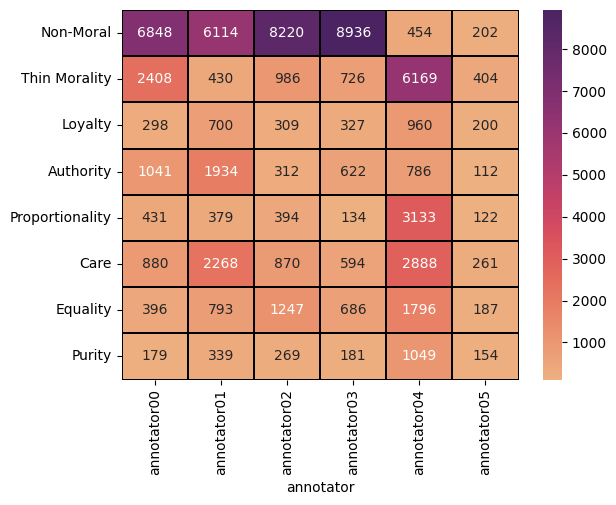

In [16]:
# Heatmap of annotator labels
sns.heatmap(annotator_labels.T, annot=True, fmt='d',cmap='flare', linewidths=0.1, linecolor='black');

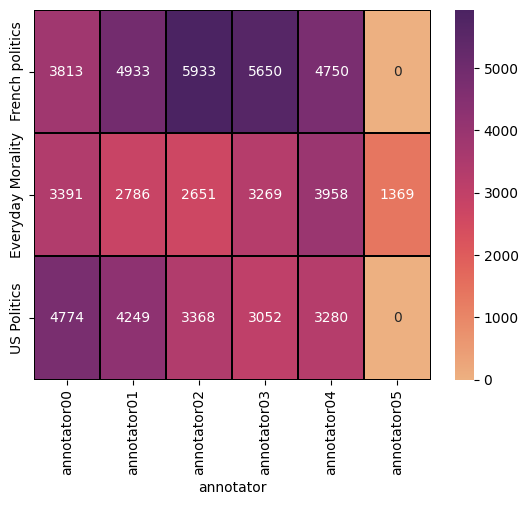

In [17]:
# Heatmap of the annotator buckets
sns.heatmap(annotator_buckets.T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black');

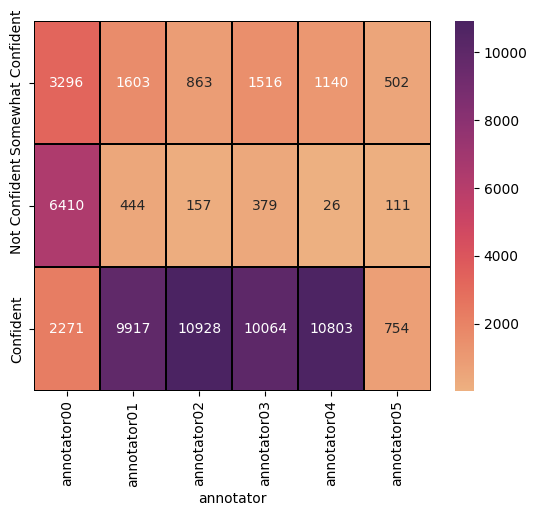

In [18]:
# Heatmap of the annotator confidence
sns.heatmap(annotator_confidence.T, annot=True, fmt='d',cmap='flare', linewidths=0.1, linecolor='black');

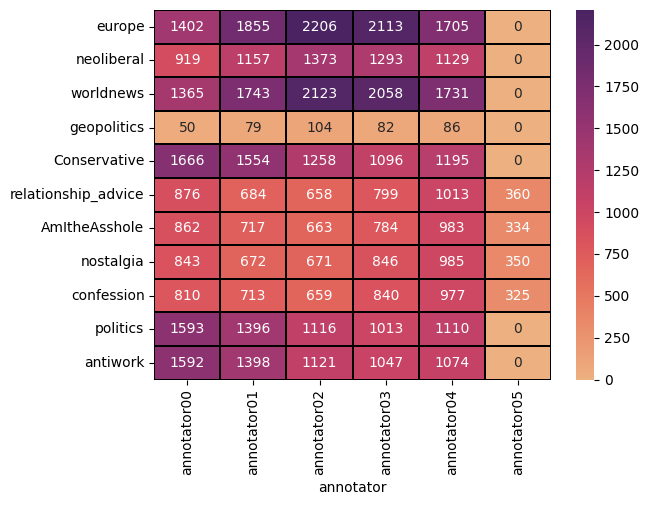

In [19]:
# Heatmap of the annotator subreddit
sns.heatmap(annotator_subreddit.T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black');

[Text(0.5, 1.0, 'Annotator 0')]

[Text(0.5, 1.0, 'Annotator 1')]

[Text(0.5, 1.0, 'Annotator 2')]

[Text(0.5, 1.0, 'Annotator 3')]

[Text(0.5, 1.0, 'Annotator 4')]

[Text(0.5, 1.0, 'Annotator 5')]

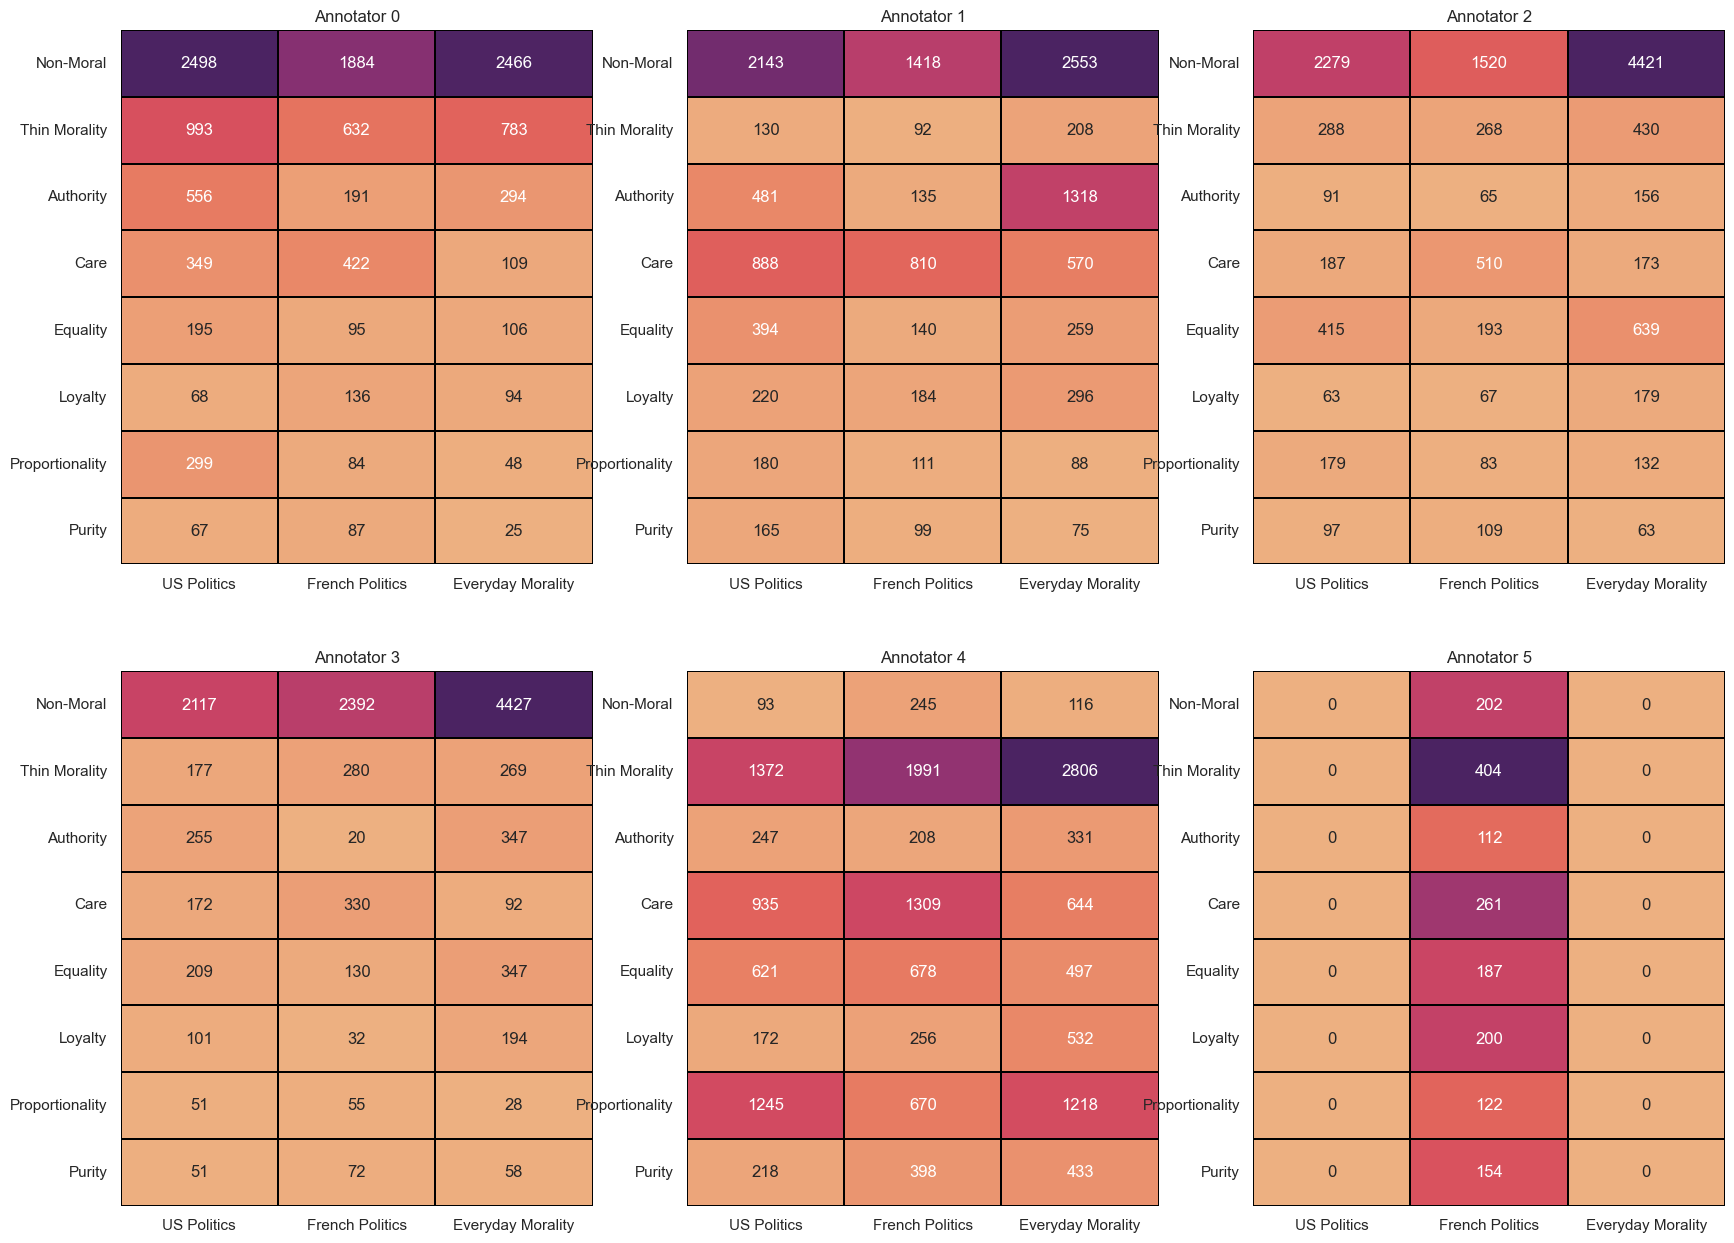

In [20]:
sns.set(rc={'figure.figsize':(20.7,15.27)})
fig,ax = plt.subplots(2,3)
sns.heatmap(bucket_label[0].T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black',ax=ax[0,0], cbar=False).set(title='Annotator 0')
sns.heatmap(bucket_label[1].T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black',ax=ax[0,1], cbar=False).set(title='Annotator 1')
sns.heatmap(bucket_label[2].T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black',ax=ax[0,2], cbar=False).set(title='Annotator 2')
sns.heatmap(bucket_label[3].T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black',ax=ax[1,0], cbar=False).set(title='Annotator 3')
sns.heatmap(bucket_label[4].T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black',ax=ax[1,1], cbar=False).set(title='Annotator 4')
sns.heatmap(bucket_label[5].T, annot=True, fmt='.0f',cmap='flare', linewidths=0.1, linecolor='black',ax=ax[1,2], cbar=False).set(title='Annotator 5')

[Text(0.5, 1.0, 'Annotator 0')]

[Text(0.5, 1.0, 'Annotator 1')]

[Text(0.5, 1.0, 'Annotator 2')]

[Text(0.5, 1.0, 'Annotator 3')]

[Text(0.5, 1.0, 'Annotator 4')]

[Text(0.5, 1.0, 'Annotator 5')]

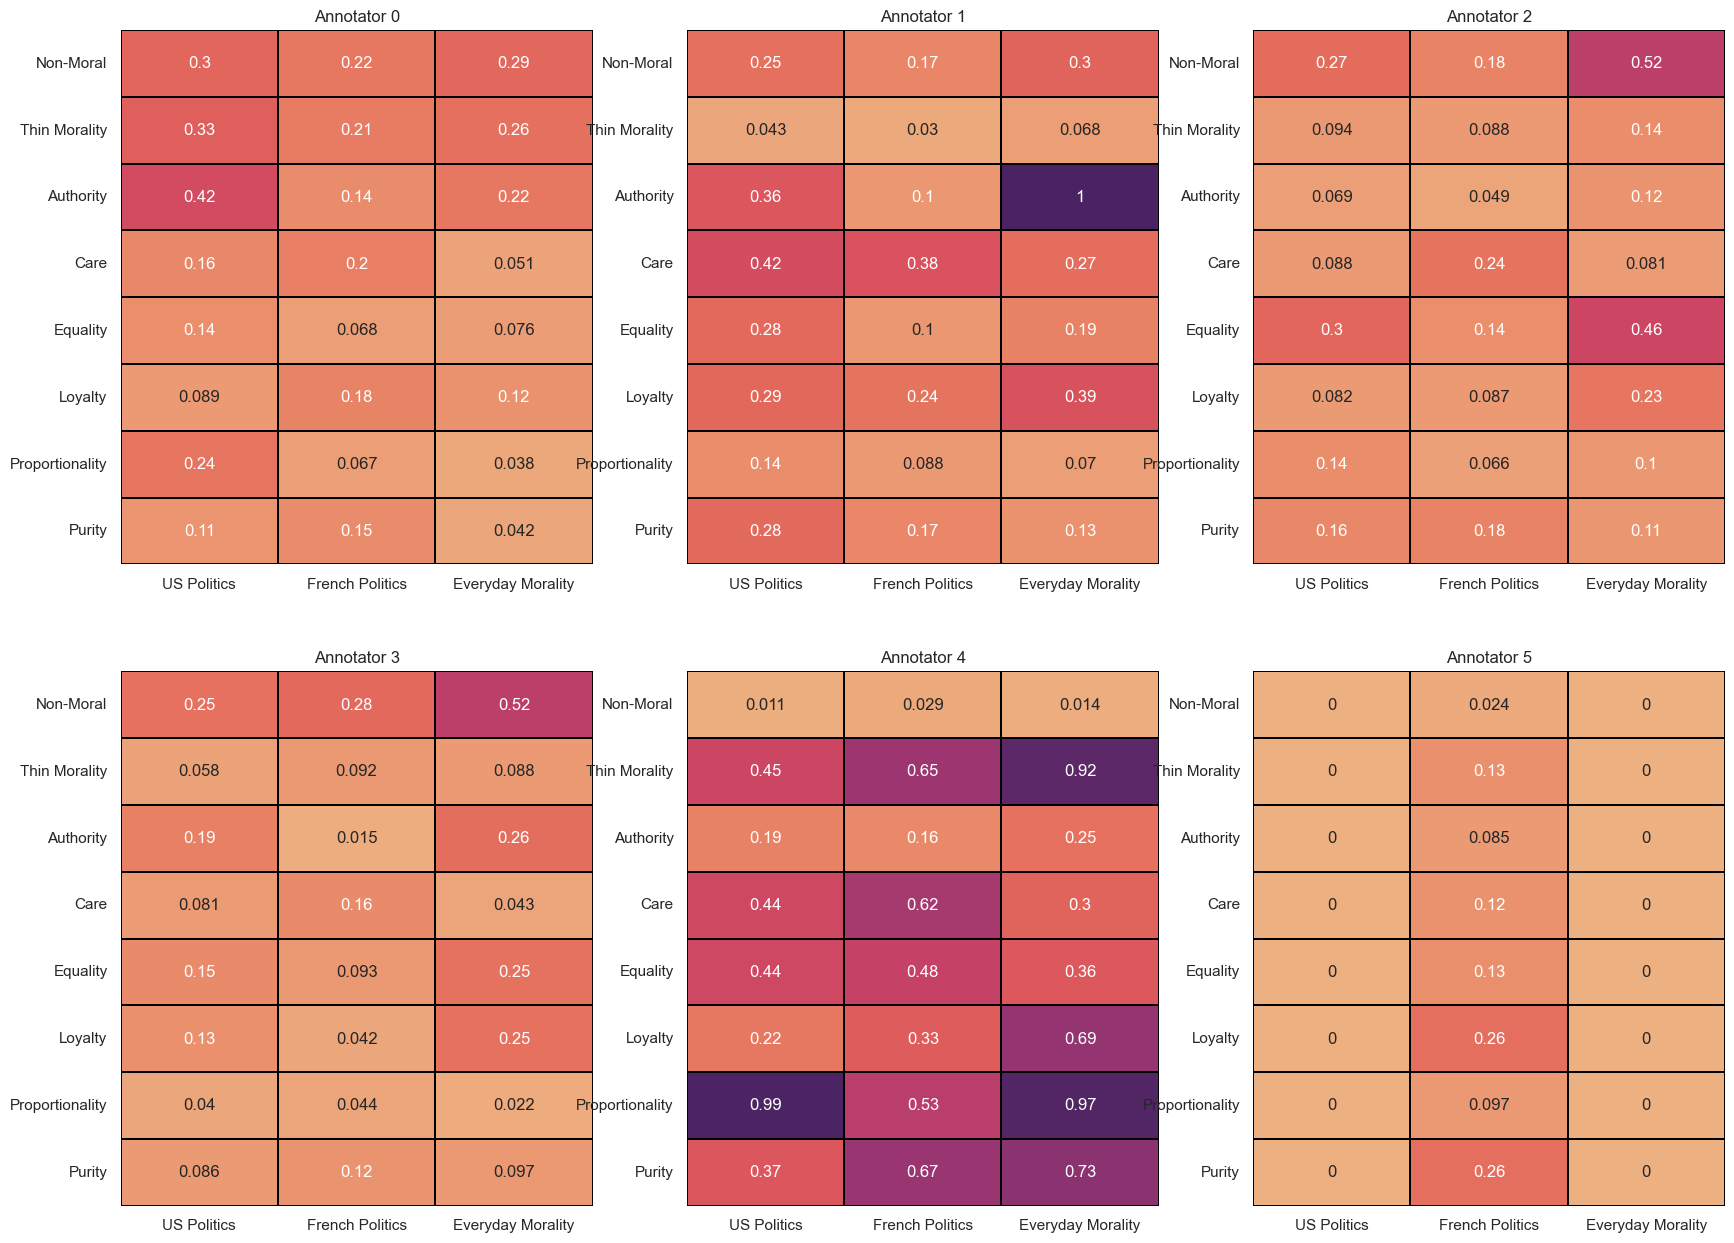

In [21]:
bl_norm = []
for x in range(6):
    bl_norm.append(bucket_label[x]/labels)
    bl_norm[x] = bl_norm[x][['Non-Moral','Thin Morality','Authority','Care','Equality','Loyalty','Proportionality','Purity']]

bl_max = np.max(bl_norm)
bl_min = np.min(bl_norm)
for x in range(6):
    bl_norm[x] = (bl_norm[x]) / (bl_max - bl_min)
    
sns.set(rc={'figure.figsize':(20.7,15.27)})
fig,ax = plt.subplots(2,3)
sns.heatmap(bl_norm[0].T, annot=True,cmap='flare', linewidths=0.1, linecolor='black',ax=ax[0,0], cbar=False,vmin=0,vmax=1).set(title='Annotator 0')
sns.heatmap(bl_norm[1].T, annot=True,cmap='flare', linewidths=0.1, linecolor='black',ax=ax[0,1], cbar=False,vmin=0,vmax=1).set(title='Annotator 1')
sns.heatmap(bl_norm[2].T, annot=True,cmap='flare', linewidths=0.1, linecolor='black',ax=ax[0,2], cbar=False,vmin=0,vmax=1).set(title='Annotator 2')
sns.heatmap(bl_norm[3].T, annot=True,cmap='flare', linewidths=0.1, linecolor='black',ax=ax[1,0], cbar=False,vmin=0,vmax=1).set(title='Annotator 3')
sns.heatmap(bl_norm[4].T, annot=True,cmap='flare', linewidths=0.1, linecolor='black',ax=ax[1,1], cbar=False,vmin=0,vmax=1).set(title='Annotator 4')
sns.heatmap(bl_norm[5].T, annot=True,cmap='flare', linewidths=0.1, linecolor='black',ax=ax[1,2], cbar=False,vmin=0,vmax=1).set(title='Annotator 5')

Empty DataFrame
Columns: []
Index: []


ValueError: zero-size array to reduction operation fmin which has no identity

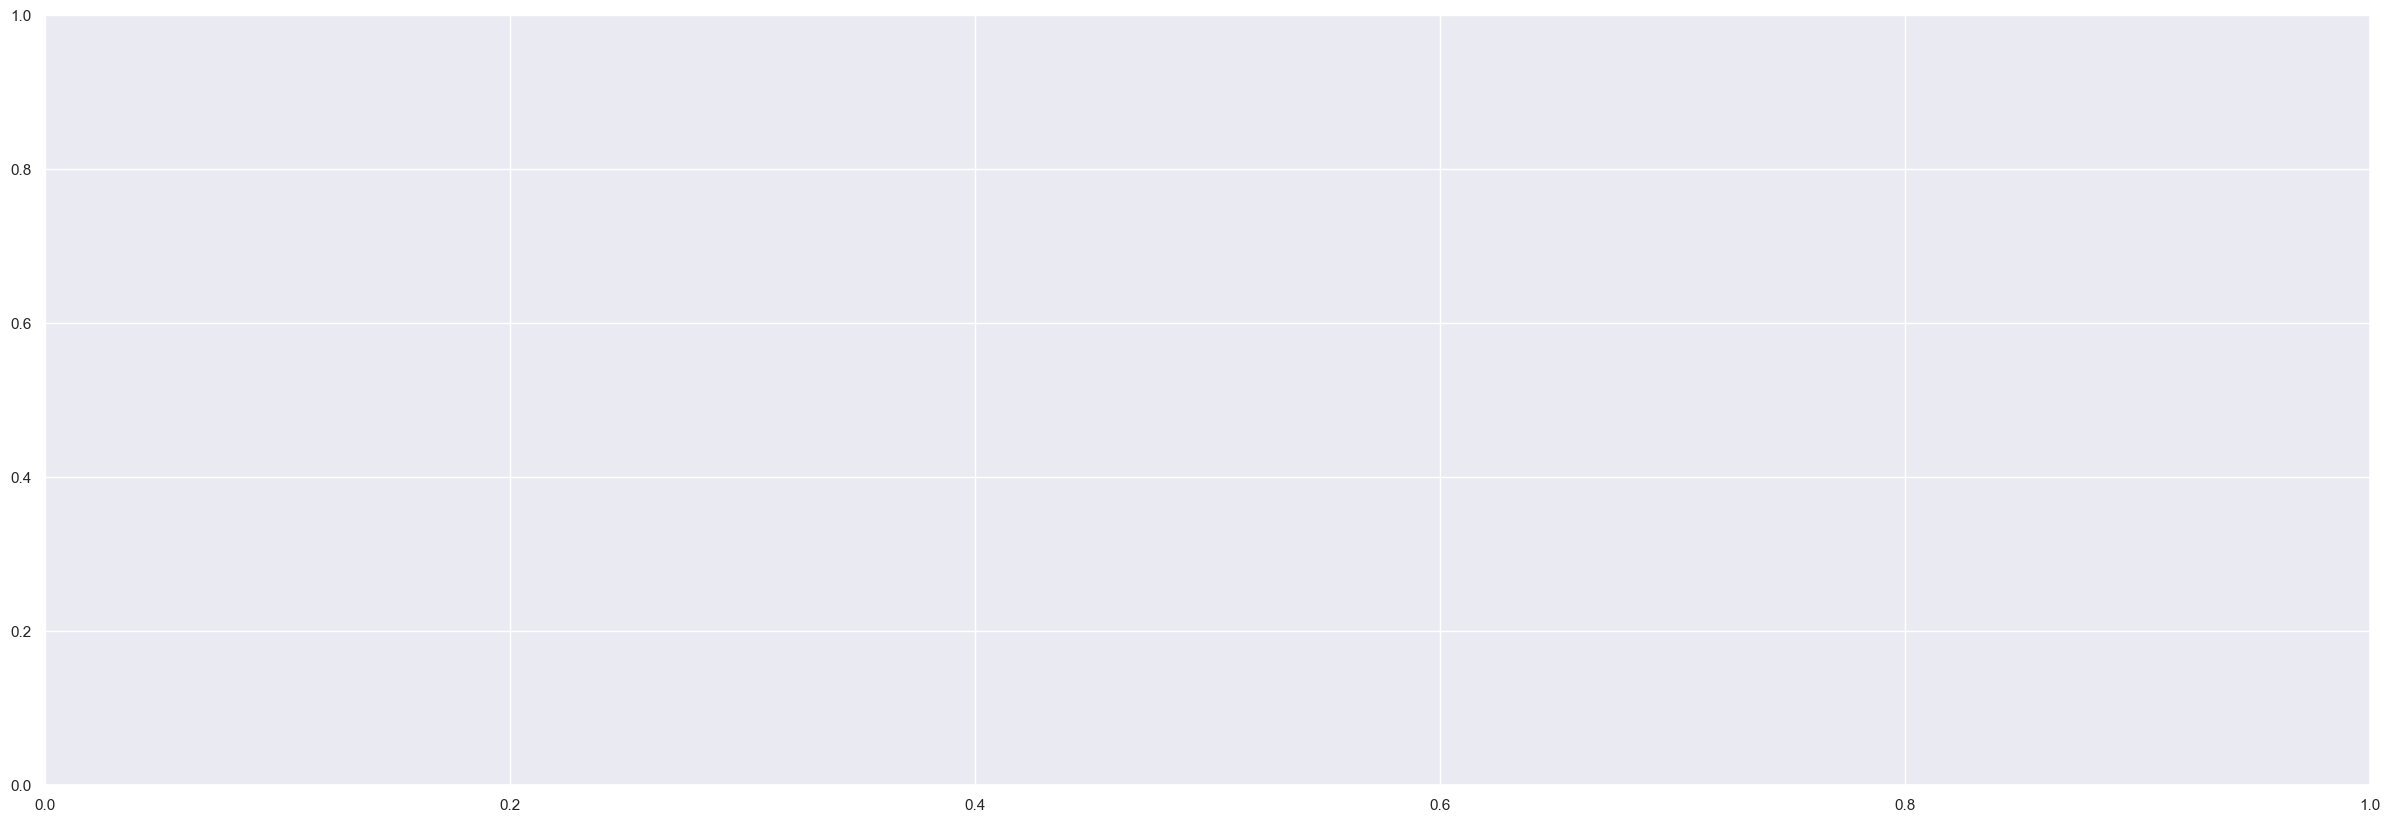

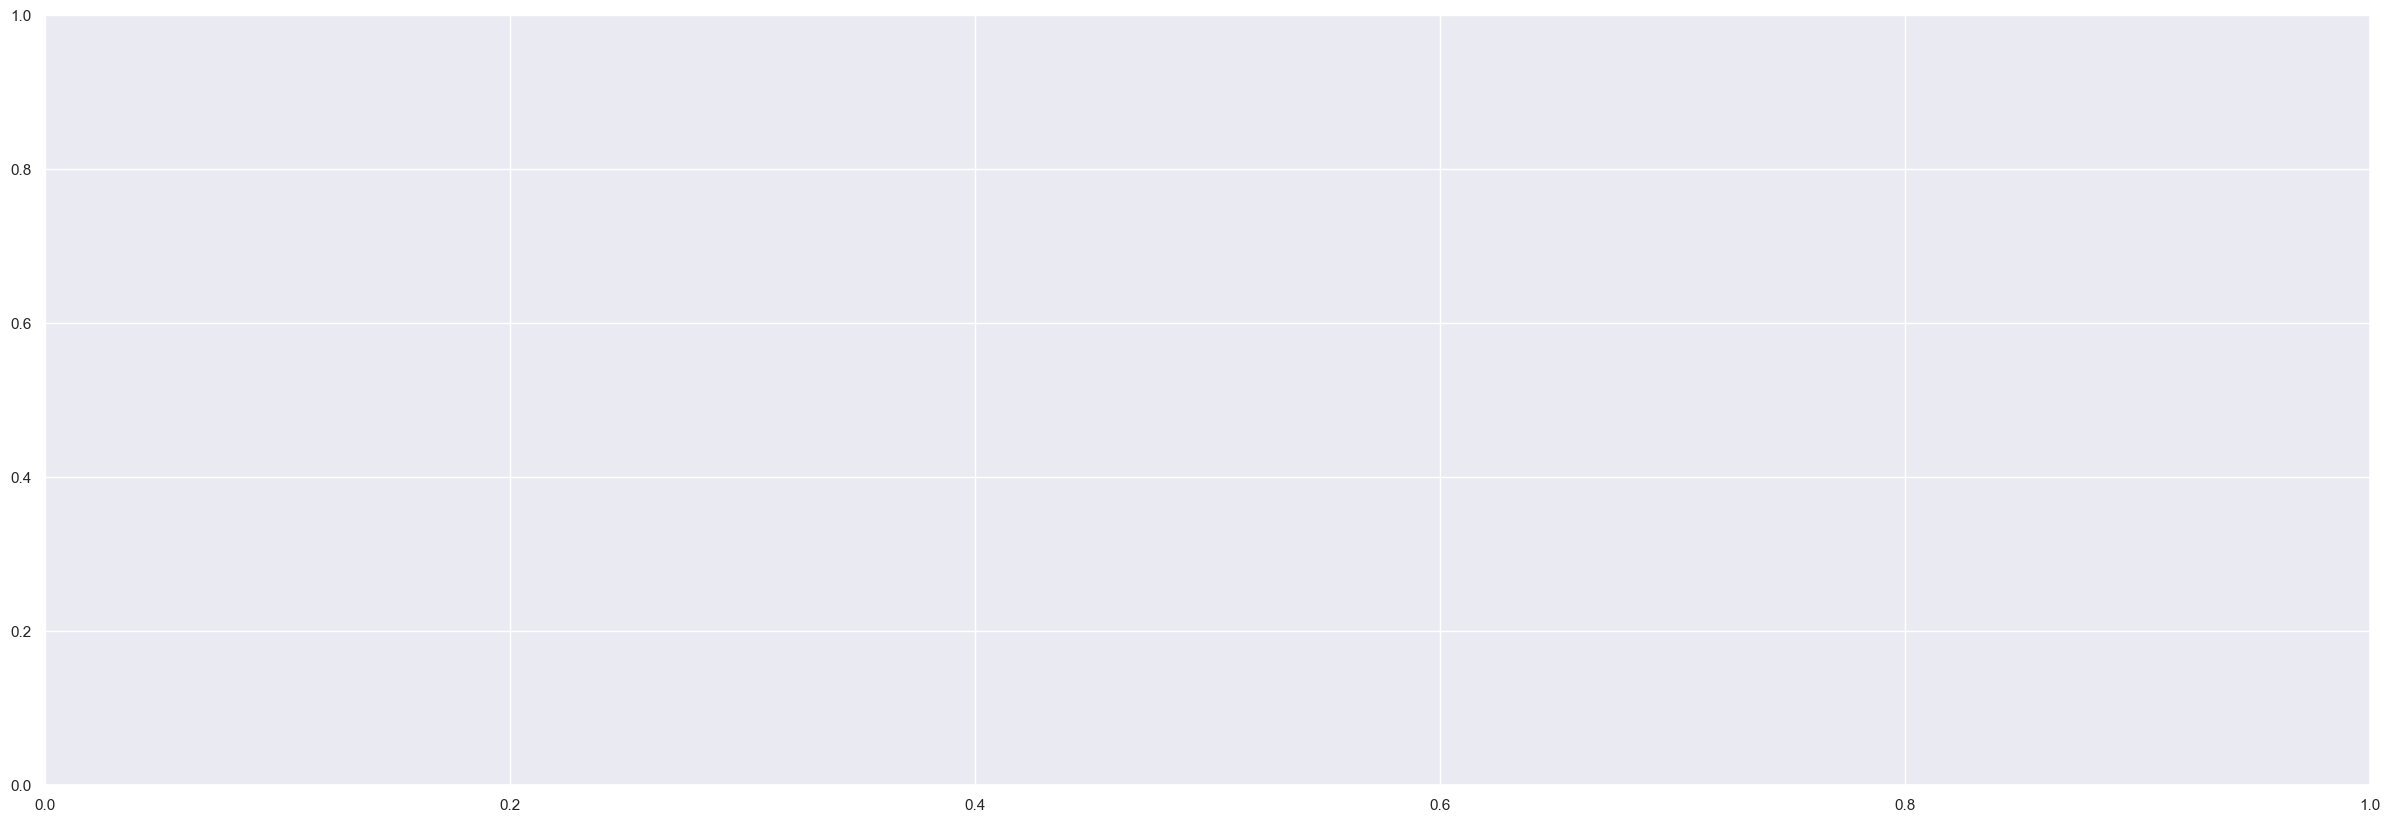

In [22]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = df.corr(method = "pearson").round(2)
print(cor_df)
#sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

In [80]:
decomp = pd.DataFrame()

for i, row in enumerate(df["annotation"]):
    words = row.split(',')
    for word in words:
        decomp = decomp.append(df.iloc[i]);
        decomp.loc[decomp.index[-1], 'annotation']=word 
print(decomp)
        
        

                                                    text      subreddit  \
0      That particular part of the debate is especial...         europe   
1      That particular part of the debate is especial...         europe   
2      That particular part of the debate is especial...         europe   
3      /r/france is pretty lively, with it's own ling...         europe   
4      /r/france is pretty lively, with it's own ling...         europe   
...                                                  ...            ...   
61221  Well I can discern from your vehemence toward ...  AmItheAsshole   
61222  Kick! Punch! It's all in the mind. If you wann...      nostalgia   
61223  Reddit can’t help you this is some seriously t...     confession   
61224  Yes. Disordered eating is insidious. And Rita ...  AmItheAsshole   
61225  What parent would let a kid bring a Gameboy to...      nostalgia   

                  bucket    annotator     annotation          confidence  
0        French politics

<AxesSubplot:>

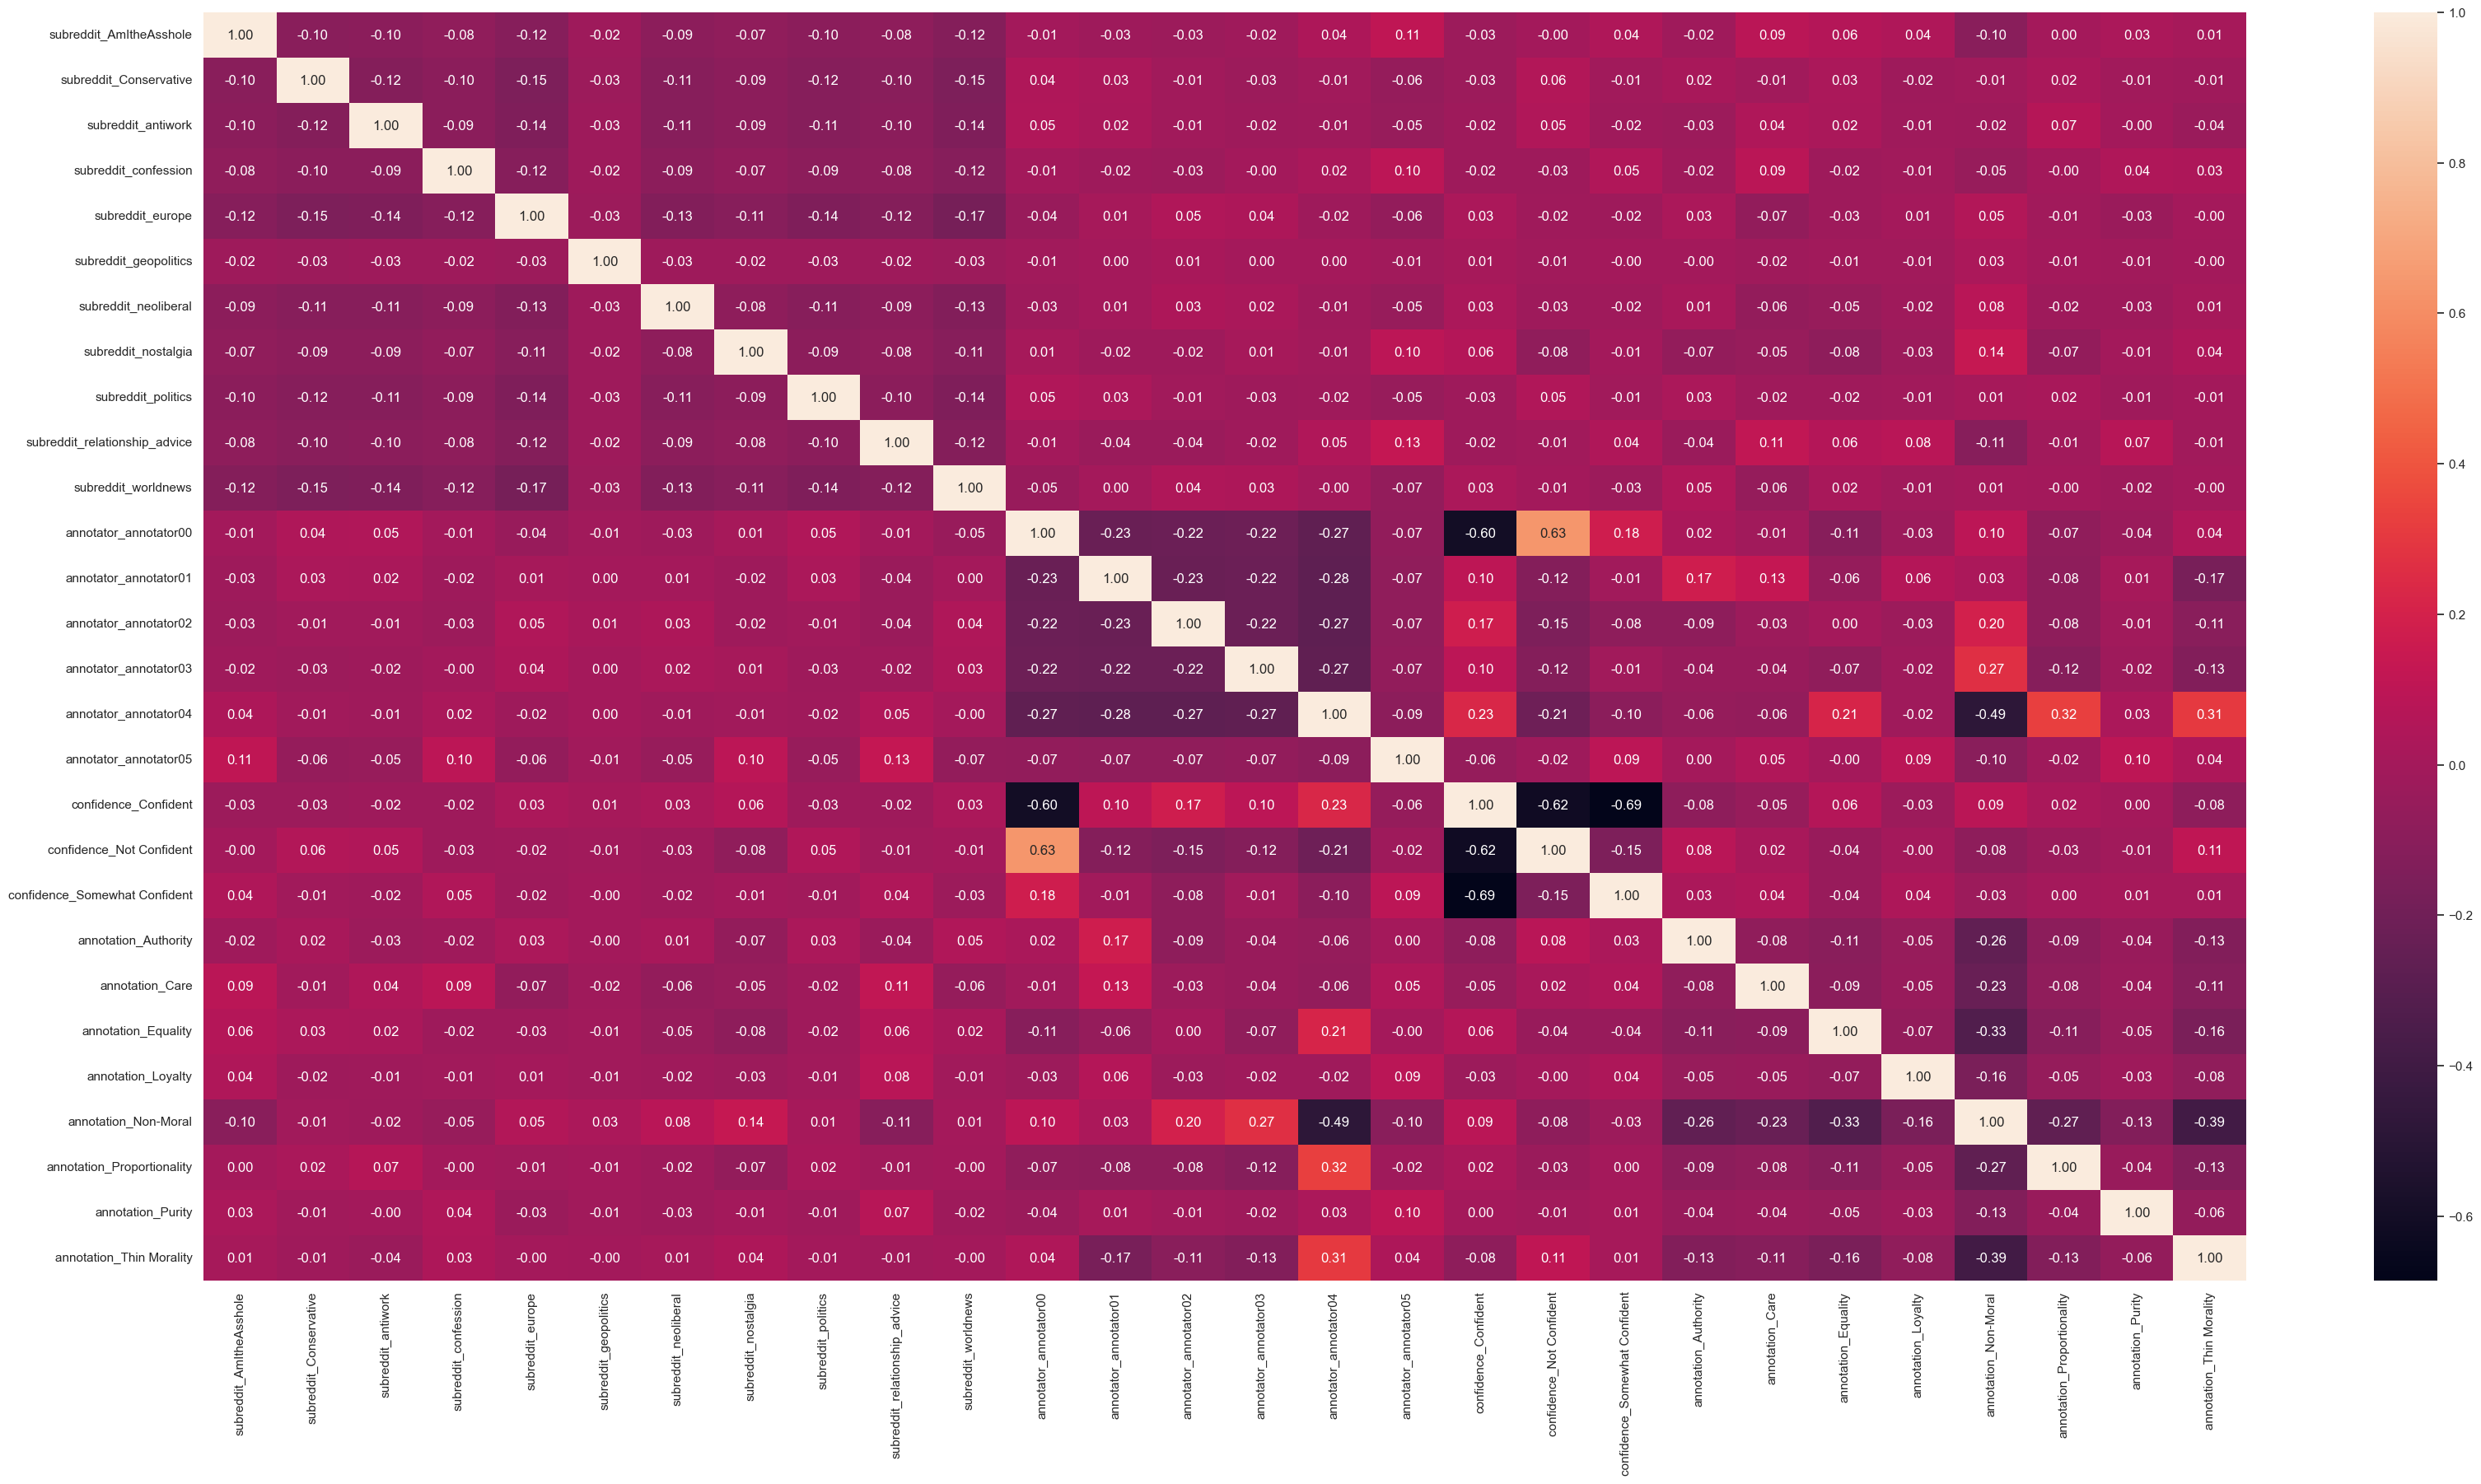

In [87]:
#decomp.to_csv('decomp.csv')
df_corr = pd.get_dummies(data=decomp, columns=['subreddit','annotator','confidence','annotation'])

cor_df = df_corr.corr(method="pearson")

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(cor_df, annot=True, fmt='.2f')

<AxesSubplot:>

bucket_Everyday Morality  \
bucket_Everyday Morality                       1.000000   
bucket_French politics                        -0.525347   
bucket_US Politics                            -0.418605   
annotator_annotator00                         -0.001620   
annotator_annotator01                         -0.056584   
annotator_annotator02                         -0.068526   
annotator_annotator03                         -0.012574   
annotator_annotator04                          0.049842   
annotator_annotator05                          0.239782   
confidence_Confident                          -0.021663   
confidence_Not Confident                      -0.063834   
confidence_Somewhat Confident                  0.085827   

                               bucket_French politics  bucket_US Politics  \
bucket_Everyday Morality                    -0.525347           -0.418605   
bucket_French politics                       1.000000           -0.552837   
bucket_US Politics                          -0.552837            1.000000   
annotator_annotator00                       -0.091541            0.099291   
annotator_annotator01                        0.002575            0.052666   
annotator_annotator02                        0.086920           -0.025662   
annotator_annotator03                        0.062516           -0.054411   
annotator_annotator04                       -0.013429           -0.034478   
annotator_annotator05                       -0.125969           -0.100374   
confidence_Confident                         0.074056           -0.057827   
confidence_Not Confident                    -0.038857            0.103986   
confidence_Somewhat Confident               -0.056933           -0.023286   

                               annotator_annotator00  annotator_annotator01  \
bucket_Everyday Morality                   -0.001620              -0.056584   
bucket_French politics                     -0.091541               0.002575   
bucket_US Politics                          0.099291               0.052666   
annotator_annotator00                       1.000000              -0.243092   
annotator_annotator01                      -0.243092               1.000000   
annotator_annotator02                      -0.242890              -0.242764   
annotator_annotator03                      -0.243130              -0.243003   
annotator_annotator04                      -0.243344              -0.243218   
annotator_annotator05                      -0.074583              -0.074545   
confidence_Confident                       -0.601550               0.108827   
confidence_Not Confident                    0.619096              -0.128854   
confidence_Somewhat Confident               0.181002              -0.016416   

                               annotator_annotator02  annotator_annotator03  \
bucket_Everyday Morality                   -0.068526              -0.012574   
bucket_French politics                      0.086920               0.062516   
bucket_US Politics                         -0.025662              -0.054411   
annotator_annotator00                      -0.242890              -0.243130   
annotator_annotator01                      -0.242764              -0.243003   
annotator_annotator02                       1.000000              -0.242802   
annotator_annotator03                      -0.242802               1.000000   
annotator_annotator04                      -0.243016              -0.243256   
annotator_annotator05                      -0.074483              -0.074556   
confidence_Confident                        0.203882               0.122260   
confidence_Not Confident                   -0.164689              -0.137040   
confidence_Somewhat Confident              -0.102585              -0.026621   

                               annotator_annotator04  annotator_annotator05  \
bucket_Everyday Morality                    0.049842               0.239782   
bucket_French politics                     -0.0

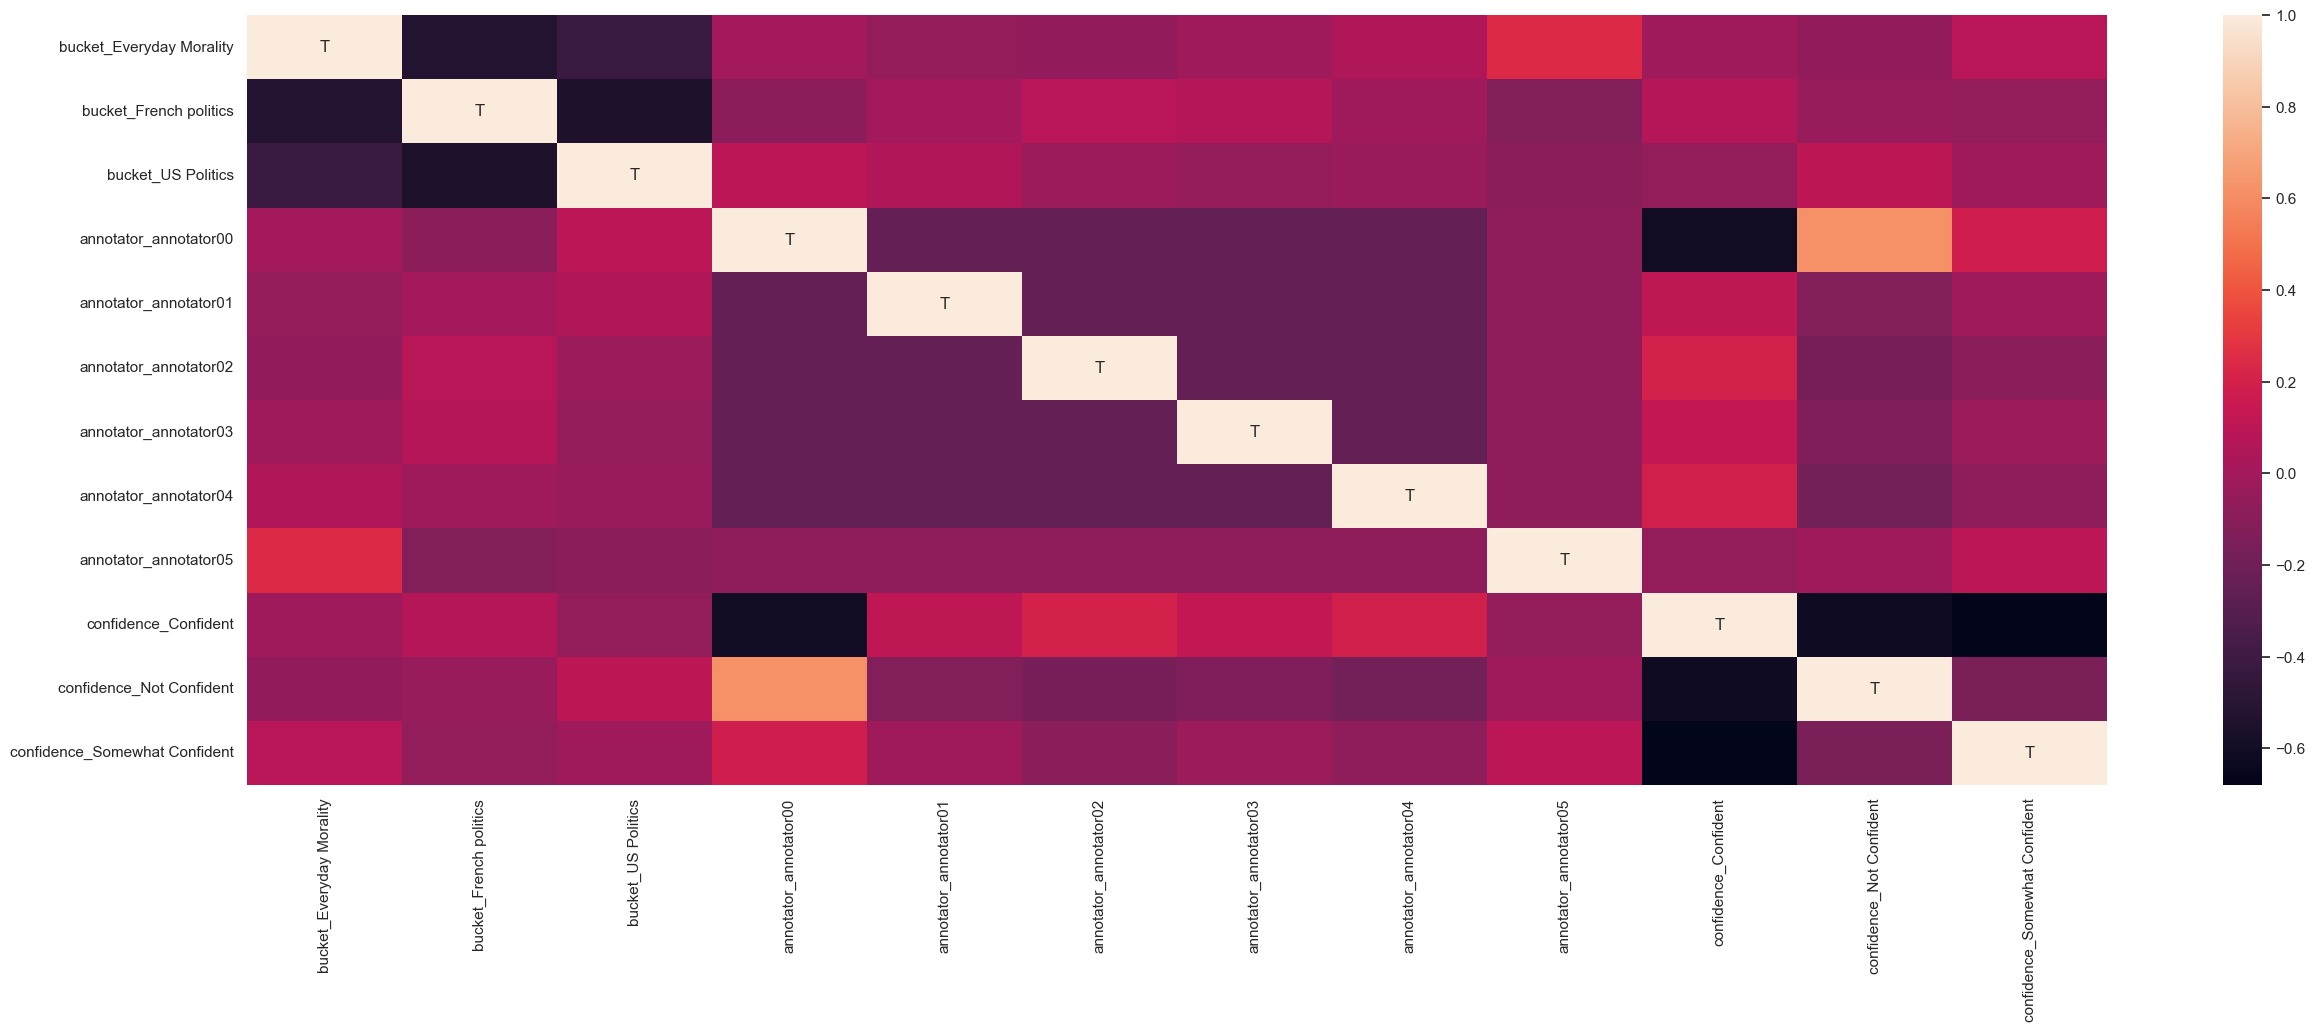

In [37]:

df_corr = pd.get_dummies(data=df, columns=['bucket','annotator','confidence'])
cor_df = df_corr.corr(method="pearson")

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')
cor_df

In [23]:
#combine tags and text into one set to put into the lstm so that the tags are associated with the text posts? 
concat_list = []
for i, word in enumerate(df['annotation']):
    concat= word + ' ' +df['text'][i]
    concat_list.append(concat)
    
concat_list

['Non-Moral That particular part of the debate is especially funny. Macron was explaining he did not think FN voters were evil and that from where he comes from he knew many, and she was like "ooooh the evil FN invaders they\'re everywhere...!" Self-awareness: zero.',
 'Purity That particular part of the debate is especially funny. Macron was explaining he did not think FN voters were evil and that from where he comes from he knew many, and she was like "ooooh the evil FN invaders they\'re everywhere...!" Self-awareness: zero.',
 'Thin Morality That particular part of the debate is especially funny. Macron was explaining he did not think FN voters were evil and that from where he comes from he knew many, and she was like "ooooh the evil FN invaders they\'re everywhere...!" Self-awareness: zero.',
 'Non-Moral /r/france is pretty lively, with it\'s own lingo that is usually deliberately bad translations - shitpost is "cacapoteau" or "compost", crosspost is "croixpoteau", etc. There\'s a 

In [ ]:
# unique = set()
# for word in df['annotation']:
#     unique.add(word) #build vocabulary of unique moral tag groups
# print(unique)


In [24]:
#tokenize text data with annotation data

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(concat_list)
txtseq = tokenizer.texts_to_sequences(concat_list)
maxseq = 500 #can likely reduce
padtxt = pad_sequences(txtseq, maxlen=maxseqtxt, padding='pre')
token_df_txt = pd.DataFrame(data=padtxt)


NameError: name 'maxseqtxt' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['annotator'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(token_df_txt, y, random_state=42, test_size=0.2)

In [ ]:
#build the model

from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(size, 128, input_length=maxseq))
model.add(LSTM(128, dropout=0.4))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=1, batch_size=1024)

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix
pred = (model.predict(x_test) > 0.5).astype("int32")
# predict_classes = np.argmax(pred, axis=1)
# expected_classes = np.argmax(y_test, axis = 0)
matrix = confusion_matrix(y_test, pred)
sklearn.metrics.ConfusionMatrixDisplay(matrix).plot()

In [ ]:
import numpy as np
from keras.layers import Input, Embedding, LSTM, Dense, concatenate
from keras.models import Model
from keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords



# input_shape_text = (None,)  # variable-length sequence of text
# input_shape_annotation = (n_annotators,)  # binary vector of length n_annotators
stop_words = set(stopwords.words('english'))



vocab_bad_words = ['\n', '/','\\',':', ';', ',', '?', '.', '\'','\n\n', '*', '!' ]
for row in df['text']:
    words = row.translate(str.maketrans('', '', string.punctuation))
    words = row.split(' ') 
    words = list(map(str.lower, words))
    word_counts = collections.Counter(words)
    for w in word_counts:
        if w not in stop_words or vocab_bad_words:
            w = w.replace("\n", '')
            vocab_words.append(word_counts)

flat_list = list(chain.from_iterable(vocab_words))
print(flat_list)
unique_vocab = set(flat_list)
